In [ ]:
import yfinance as yf
import pandas as pd

start_date = "2008-01-01"
end_date = "2024-4-12"

ticker = "^GSPC"  # S&P 500 ticker
data = yf.download(ticker, start=start_date, end=end_date)
data.to_csv("sp500_2008_daily.csv")

ticker = "^DJI"  # Dow Jones ticker
data = yf.download(ticker, start=start_date, end=end_date)
data.to_csv("dowjones_2008_daily.csv")

[*********************100%***********************]  1 of 1 completed


In [ ]:
import numpy as np

# Load the data
sp500_data = pd.read_csv("sp500_2008_daily.csv")
dowjones_data = pd.read_csv("dowjones_2008_daily.csv")

# Calculate daily returns
sp500_returns = pd.to_numeric(sp500_data['Close'].dropna().drop(0)).pct_change().dropna().to_numpy()
dowjones_returns =  pd.to_numeric(dowjones_data['Close'].dropna().drop(0)).pct_change().dropna().to_numpy()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the generator network
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, z):
        return self.model(z)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
latent_dim = 64
output_dim = 2  # Output dimension of the Cauchy distribution (2D)
num_epochs = 1000
batch_size = 64
learning_rate = 0.0001

# Initialize the networks and optimizers
generator = Generator(latent_dim, output_dim)
discriminator = Discriminator(output_dim)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate/2)


# Training loop
for epoch in range(num_epochs):
    for i in range(0, len(combined_returns), batch_size):
        real_samples = torch.tensor(combined_returns[i:i+batch_size], dtype=torch.float32)

        # Train discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(real_samples.size(0), 1)
        real_output = discriminator(real_samples)
        d_loss_real = criterion(real_output, real_labels)

        z = torch.randn(batch_size, latent_dim)
        fake_samples = generator(z)
        fake_labels = torch.zeros(batch_size, 1)
        fake_output = discriminator(fake_samples)
        d_loss_fake = criterion(fake_output, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()


        # Train generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim)
        fake_samples = generator(z)
        output = discriminator(fake_samples)
        g_loss = criterion(output, real_labels)
        g_loss.backward()
        optimizer_G.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


Epoch [10/1000], D Loss: 0.9937, G Loss: 1.2424
Epoch [20/1000], D Loss: 1.4804, G Loss: 0.5269
Epoch [30/1000], D Loss: 1.3799, G Loss: 0.8637
Epoch [40/1000], D Loss: 1.2991, G Loss: 0.9307
Epoch [50/1000], D Loss: 1.4094, G Loss: 0.6802
Epoch [60/1000], D Loss: 1.4316, G Loss: 0.7233
Epoch [70/1000], D Loss: 1.3917, G Loss: 0.7074
Epoch [80/1000], D Loss: 1.4114, G Loss: 0.6560
Epoch [90/1000], D Loss: 1.3885, G Loss: 0.7195
Epoch [100/1000], D Loss: 1.3983, G Loss: 0.6813
Epoch [110/1000], D Loss: 1.3960, G Loss: 0.7034
Epoch [120/1000], D Loss: 1.3825, G Loss: 0.7166
Epoch [130/1000], D Loss: 1.3755, G Loss: 0.7086
Epoch [140/1000], D Loss: 1.3707, G Loss: 0.7408
Epoch [150/1000], D Loss: 1.3928, G Loss: 0.7319
Epoch [160/1000], D Loss: 1.3774, G Loss: 0.6878
Epoch [170/1000], D Loss: 1.4018, G Loss: 0.6789
Epoch [180/1000], D Loss: 1.3848, G Loss: 0.7168
Epoch [190/1000], D Loss: 1.3722, G Loss: 0.7333
Epoch [200/1000], D Loss: 1.3926, G Loss: 0.6685
Epoch [210/1000], D Loss: 1.3

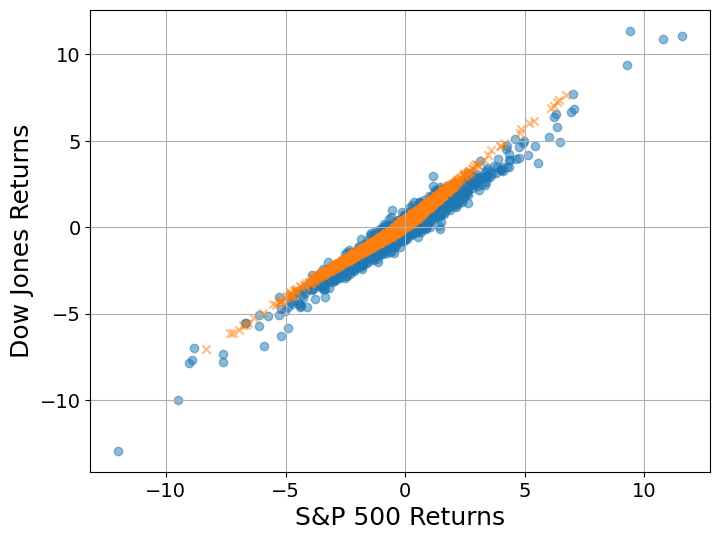

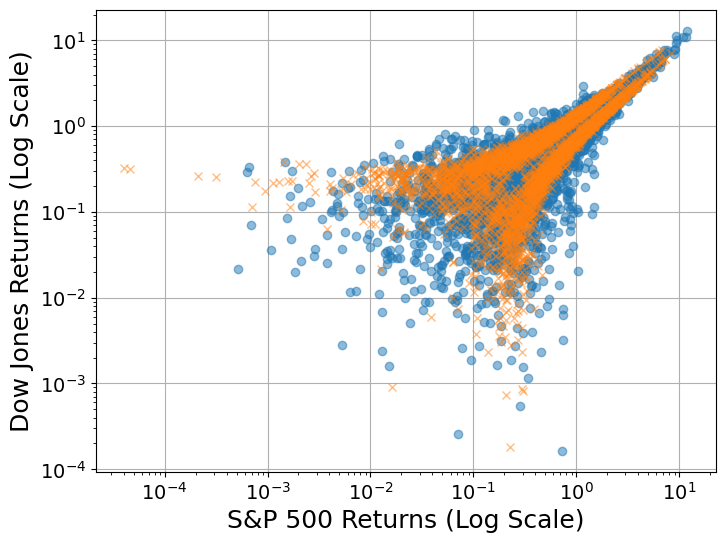

In [ ]:
np.random.seed(100)
num_samples = len(combined_returns)
z = torch.randn(num_samples, latent_dim)
generated_samples = generator(z).detach().numpy()

# 2D Scatter Plot with larger font sizes
plt.figure(figsize=(8, 6))
plt.scatter(combined_returns[:, 0], combined_returns[:, 1], marker='o', alpha=0.5)
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], marker='x', alpha=0.5)
plt.xlabel('S&P 500 Returns', fontsize=18)  # Increased font size
plt.ylabel('Dow Jones Returns', fontsize=18)  # Increased font size
plt.xticks(fontsize=14) # Increased xticks font size
plt.yticks(fontsize=14) # Increased yticks font size
plt.grid(True)
plt.savefig('scatter_plot.png')
plt.show()


# Log-Log Plot with larger font sizes
plt.figure(figsize=(8, 6))
plt.loglog(np.abs(combined_returns[:, 0]), np.abs(combined_returns[:, 1]), marker='o', linestyle='', alpha=0.5)
plt.loglog(np.abs(generated_samples[:, 0]), np.abs(generated_samples[:, 1]), marker='x', linestyle='', alpha=0.5)

plt.xlabel('S&P 500 Returns (Log Scale)', fontsize=18)  # Increased font size
plt.ylabel('Dow Jones Returns (Log Scale)', fontsize=18)  # Increased font size
plt.xticks(fontsize=14) # Increased xticks font size
plt.yticks(fontsize=14) # Increased yticks font size
plt.grid(True)
plt.savefig('loglog_plot.png')
plt.show()